In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("/kaggle/input/apple-sales-dataset-2024/apple_sales_2024.csv")
data

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29
...,...,...,...,...,...,...,...
995,Mexico,Rest of World,29.86,10.30,7.40,9.60,18.56
996,Texas,North America,27.83,12.52,8.89,4.46,6.38
997,Germany,Europe,25.47,7.69,7.90,6.90,15.00
998,Shenzhen,Greater China,15.34,8.81,8.24,8.78,15.49


In [8]:
data.head()

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            1000 non-null   object 
 1   Region                           1000 non-null   object 
 2   iPhone Sales (in million units)  1000 non-null   float64
 3   iPad Sales (in million units)    1000 non-null   float64
 4   Mac Sales (in million units)     1000 non-null   float64
 5   Wearables (in million units)     1000 non-null   float64
 6   Services Revenue (in billion $)  1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [10]:
data.describe()

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,17.444500,8.565880,5.555760,6.935500,12.447130
std,7.180077,3.735994,2.506491,2.951677,4.306347
min,5.030000,2.020000,1.010000,2.000000,5.010000
25%,11.447500,5.432500,3.470000,4.330000,8.710000
50%,17.130000,8.695000,5.550000,6.815000,12.205000
75%,23.715000,11.740000,7.730000,9.532500,16.252500
max,29.940000,14.990000,9.990000,12.000000,19.920000


In [11]:
data["State"].unique()

array(['Chongqing', 'Germany', 'UK', 'Shanghai', 'Thailand', 'New York',
       'Mexico', 'Italy', 'Hong Kong', 'Canada', 'Japan', 'Spain',
       'Australia', 'Beijing', 'India', 'Texas', 'California',
       'South Africa', 'Brazil', 'Florida', 'Illinois', 'South Korea',
       'Indonesia', 'Shenzhen', 'France'], dtype=object)

In [12]:
data["Region"].unique()

array(['Greater China', 'Europe', 'Rest of Asia', 'North America',
       'Rest of World'], dtype=object)

In [15]:
data.groupby("Region")[["iPhone Sales (in million units)"]].mean().reset_index()

,Region,iPhone Sales (in million units)
0,Europe,17.466275
1,Greater China,17.663379
2,North America,17.551348
3,Rest of Asia,17.367978
4,Rest of World,17.183077


In [16]:
data.groupby("Region")[["iPad Sales (in million units)"]].mean().reset_index()

,Region,iPad Sales (in million units)
0,Europe,8.557157
1,Greater China,8.506621
2,North America,9.131685
3,Rest of Asia,8.276742
4,Rest of World,8.409819


In [22]:
#Bölgelere göre hangi ürünün satışlarının fazla olduğunun grafiğini çizelim.

region_category_sales = data.groupby(["Region"])[["iPhone Sales (in million units)","iPad Sales (in million units)","Mac Sales (in million units)",	"Wearables (in million units)",	"Services Revenue (in billion $)"]].mean().reset_index()
region_category_sales

,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Europe,17.466275,8.557157,5.447157,6.632941,11.844608
1,Greater China,17.663379,8.506621,5.537900,6.917169,12.697352
2,North America,17.551348,9.131685,5.780674,7.151236,12.815787
3,Rest of Asia,17.367978,8.276742,5.522135,7.282528,12.736798
4,Rest of World,17.183077,8.409819,5.519638,6.779683,12.225113


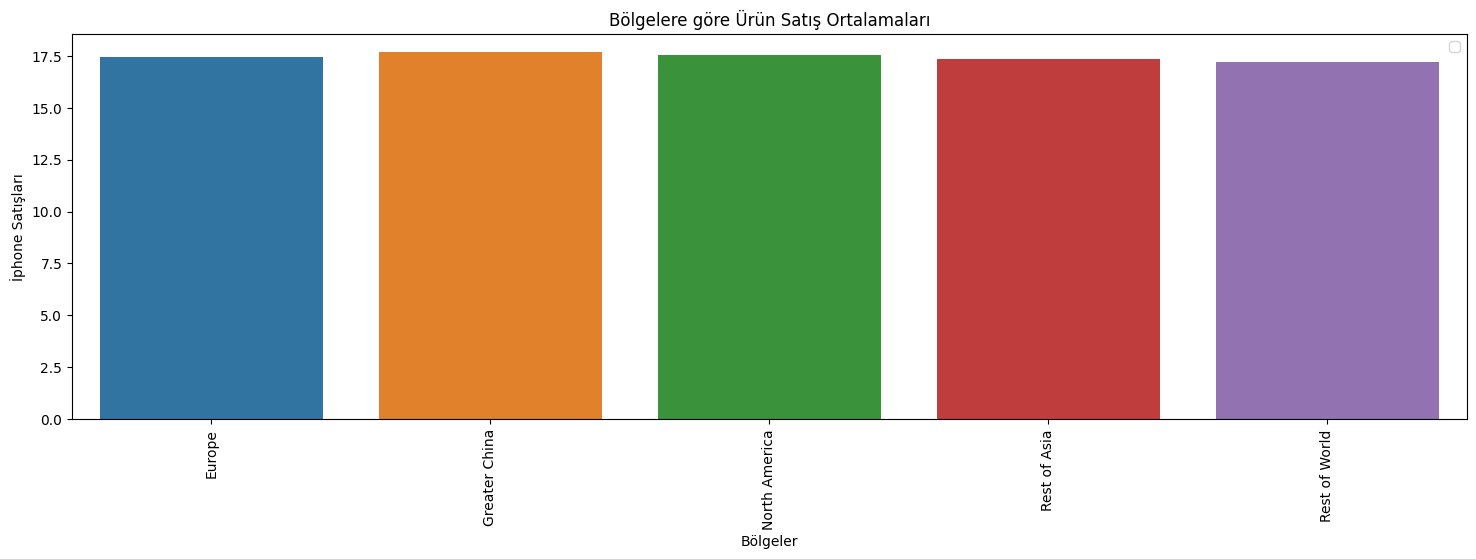

In [25]:
plt.figure(figsize=(18,5))
sns.barplot(x = "Region",y = "iPhone Sales (in million units)",data=region_category_sales)
plt.title("Bölgelere göre Ürün Satış Ortalamaları")
plt.xlabel("Bölgeler")
plt.ylabel("İphone Satışları")
plt.legend(loc="upper right")
plt.xticks(rotation=90);

In [26]:
data.head()

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29


In [43]:
state_category = data.groupby(["State","Region"])[["iPhone Sales (in million units)","iPad Sales (in million units)",
                                           "Mac Sales (in million units)",	"Wearables (in million units)",	
                                           "Services Revenue (in billion $)"]].sum().reset_index()
state_category

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Australia,Rest of World,642.96,393.68,238.93,267.50,541.19
1,Beijing,Greater China,757.27,344.28,238.24,284.83,532.03
2,Brazil,Rest of World,844.50,405.45,240.84,328.77,523.41
3,California,North America,843.34,459.86,250.88,345.03,591.67
4,Canada,Rest of World,784.68,332.87,263.73,299.30,550.15
5,Chongqing,Greater China,652.60,361.54,209.76,281.00,535.93
6,Florida,North America,479.70,228.39,164.49,196.67,324.07
7,France,Europe,724.19,326.43,229.74,351.72,550.11
8,Germany,Europe,658.35,308.73,212.28,224.01,419.05
9,Hong Kong,Greater China,934.06,463.24,268.37,352.83,631.51


Text(0.5, 1.0, 'Bölgelere göre Ürün Satışı')

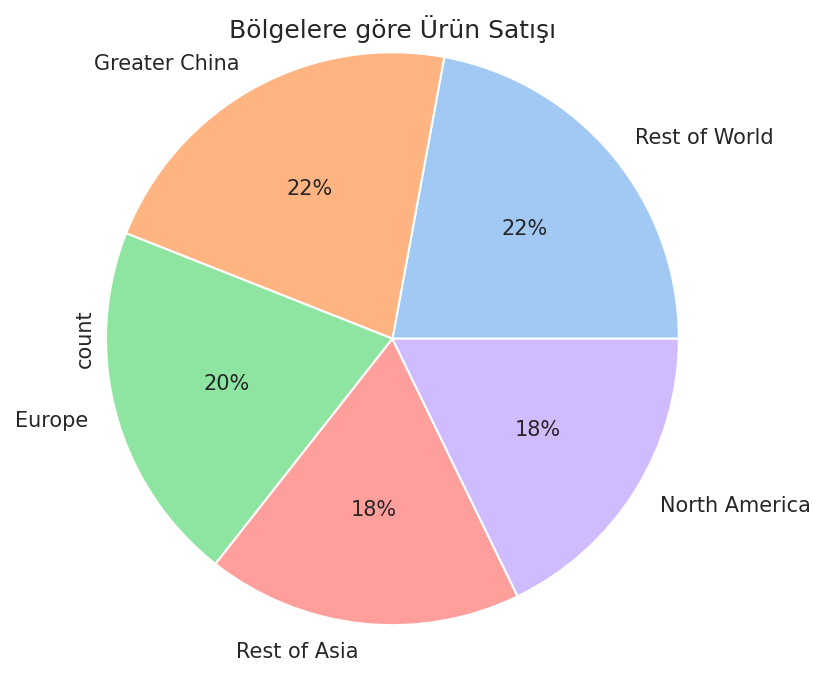

In [68]:
#bölgelere göre  ürün satışları

sns.set_style('whitegrid')
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(121)
data['Region'].value_counts().plot(kind='pie', autopct='%2.f%%', radius=1.24, colors=sns.color_palette('pastel'))
plt.title("Bölgelere göre Ürün Satışı")




In [79]:
data.rename(columns={'iPhone Sales (in million units)':'iPhone_Sales','iPad Sales (in million units)':'iPad_Sales',
                     'Mac Sales (in million units)':'Mac_Sales','Wearables (in million units)':'Wearables',
                    'Services Revenue (in billion $)':'Services_Revenue'},inplace=True)

In [80]:
data.head()

,State,Region,iPhone_Sales,iPad_Sales,Mac_Sales,Wearables,Services_Revenue
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29


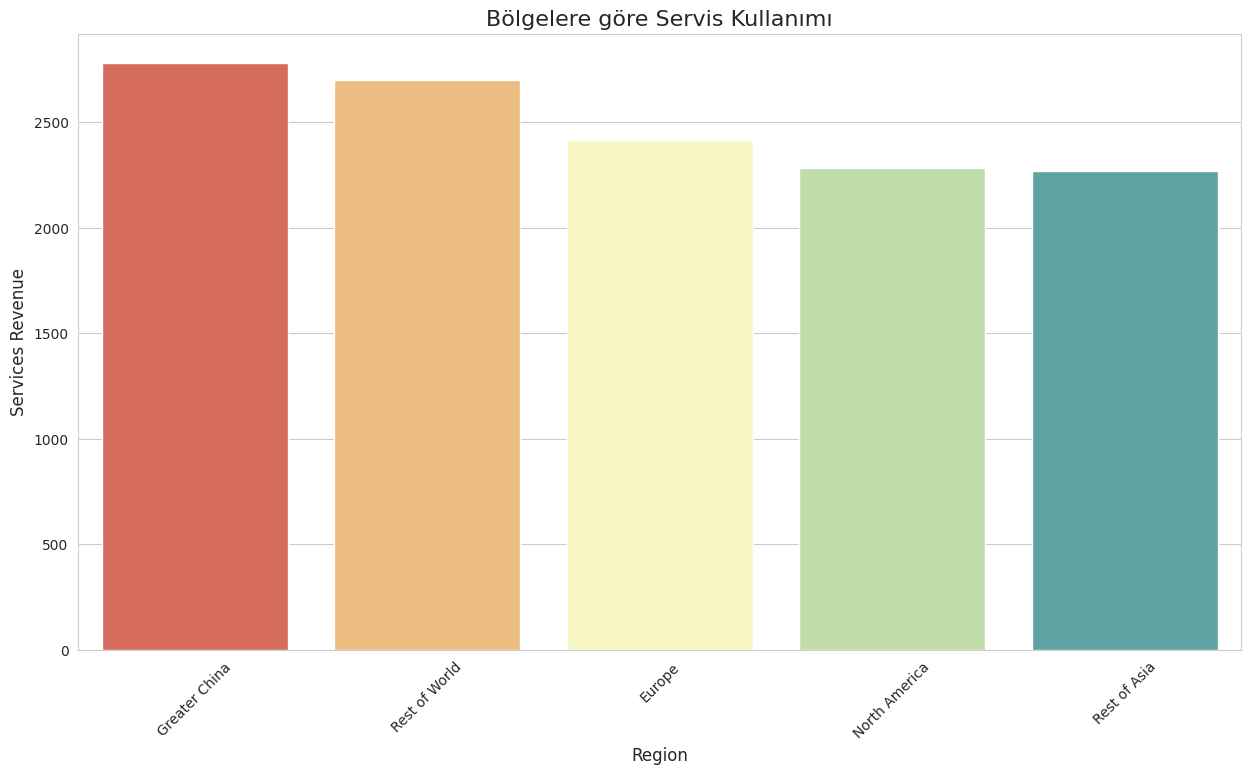

In [82]:
#Bölgelere göre en çok servis kullanım oranını grafikle

g1=data.groupby(['Region'])['Services_Revenue'].sum().reset_index().sort_values(by='Services_Revenue',ascending=False)

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=g1,x='Region',y='Services_Revenue',palette='Spectral')
ax.set_title('Bölgelere göre Servis Kullanımı', fontsize=16)
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Services Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [83]:
def stackbar(data):
    categories = data.index
    values = data.values
    columns=data.columns
    
    fig, ax = plt.subplots(figsize=(15,6))
    cum_sum=np.zeros(len(categories))

    for i,columns in enumerate(columns):
        plot = ax.bar(categories, values[:,i],bottom=cum_sum,label=columns)
        cum_sum+=values[:,i]
    return (plot)

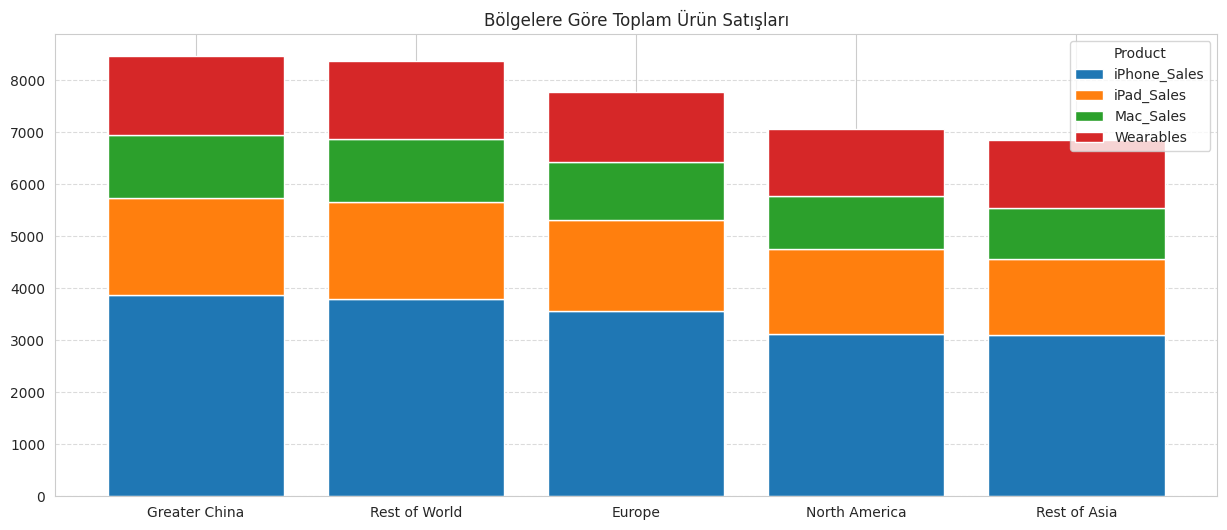

In [85]:
g3=data.groupby(['Region']).agg({'iPhone_Sales':'sum','iPad_Sales':'sum','Mac_Sales':'sum','Wearables':'sum'}).sort_values(by='iPhone_Sales',ascending=False)
stackbar(g3)
plt.title('Bölgelere Göre Toplam Ürün Satışları')
plt.legend(title='Product', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
